In [12]:
# read data
islands = read.csv("islands.csv")
head(islands)

Name              dis.isl.MT dist.isl.MF dist.group mean.height size no.ramet
1 Generalsgrundet2   231        231        230.78852  43.00       0.09 60      
2 Spikarna2         1106       1500         75.73528  18.67       0.82 48      
3 VI2                155        305         66.75000  40.00       1.84 24      
4 Stensundsklobben1  275        105          5.29000  43.42       1.09 94      
5 Stensundsklobben2  310        105        104.60750  22.50       0.15  4      
6 Pargrunden2        432        282        281.58354  20.00       0.12 32      
  no.group dist.land no.hab trees dens.ramet dens.group mt.presence mf.presence
1 1         115      2      0     666.66667  11.111111  0           1          
2 1        2260      2      0      58.53659   1.219512  0           0          
3 3        1018      2      1      13.04348   1.630435  0           0          
4 4         163      4      1      86.23853   3.669725  0           1          
5 1          87      1      0      26.66667   6.666667  0           1          
6 1         179      1      0     266.66667   8.333333  0           0

In [ ]:
#estimate parameter for original data with backward selection
islands.glm <- glm(mf.presence~1+dis.isl.MT + dist.group + mean.height + dist.land + no.hab + dens.ramet + dens.group + 
                   dens.ramet:dis.isl.MT + dens.group:dis.isl.MT + dens.ramet:dist.land + dens.group:dist.land + dist.land:dis.isl.MT
                   + no.hab:dens.group + no.hab:dens.ramet , data=islands,family="binomial")
summary(islands.glm)
islands.glm.back = step(islands.glm,direction = "backward")

summarylist_islands.glm.back =  summary(islands.glm.back)$coef

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


 int 50
[1] " NEW SIMULATION MIT SAMPLESIZE"
 num -1.93
[1] "mean:"
 num 1.55
[1] "sd: "


ERROR: Error in seq.default(min(unlist(parameter[, i])) - 10 * inv_Fisher_inf[i, : 'by' argument is much too small


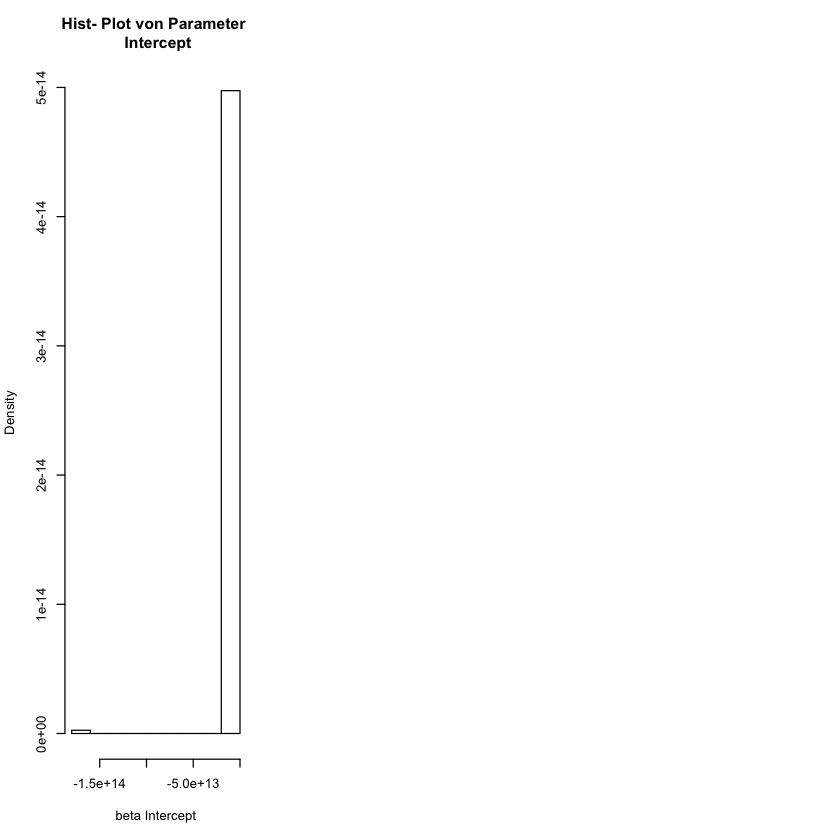

In [3]:
# Simulation loop

# Problem for small sample size ~ 50 : 

#Warning message:
#"glm.fit: fitted probabilities numerically 0 or 1 occurred"

# Samlesizes smaller than 50: The algorithm does not convergate

# but it becomes better with larger samplezise

parameterlist = list( "Intercept", "dis.isl.MT"  , "dist.land", "no.hab",  "dens.ramet", "dens.group", "dist.land:dens.group", 
                   "no.hab:dens.ramet")

newdesignmatrix = islands[sample(nrow(islands), 50), ]
numberofloops = 4

k = 1

    # start simulation
    set.seed(1)
    #number pseudo observations
    simanz <- 200

    #number coeffizients
    m = length(coef(islands.glm.back))
    #m

    # matrix to save parameters, that are estimated for the different pseudoobservations
    parameter = matrix(0, simanz, m)

while (k < numberofloops)
    {
    # estimate parameter for the data of desing matrix
    newmod_newdesignmatrix <- glm(mf.presence ~1+dis.isl.MT  + dist.land + no.hab + dens.ramet + dens.group+ dist.land:dens.group + 
                   no.hab:dens.ramet, data=newdesignmatrix, family=binomial(link="logit") )

    # calculate inverse fisher information
    inv_Fisher_inf = vcov(newmod_newdesignmatrix)
    #inv_Fisher_inf

    # list for datas of the model
    summarylist_newdesignmatrix =  summary(newmod_newdesignmatrix)$coef
    #summarylist_newdesignmatrix
    summarylist_newdesignmatrix[1,1]

    # number of rows of designmatrix
    n <- nrow(newdesignmatrix)
    #n

    # calculate expaction value (assume the estimated parameters from the origninal model as true parameter, 
    # because we assume that the model of the original data is the true model
    mu <- predict(islands.glm.back, type="response", newdata=newdesignmatrix)
    #mu
    
    for (i in 1:simanz)
         {
         ### Simulation of pseudo observations
         y.sim <- rbinom(n,1, prob = mu)
         ### estimation parameters
         newmod <- glm(y.sim~1+dis.isl.MT  + dist.land + no.hab + dens.ramet + dens.group+ dist.land:dens.group + 
                           no.hab:dens.ramet, data=newdesignmatrix, family=binomial(link="logit") )
         ### storage parameters 
         summarylist =  summary(newmod)$coef
                for (p in 1:m){
                    parameter[i,p] = summarylist[p,1]}
            }
    
    # plot distribution for [,1], that means the intercept parameter 
    #options(repr.plot.width = 10, repr.plot.height = 5)
    
   sprintf(" NEW SIMULATION MIT SAMPLESIZE %i", n)

    for (i in 1:m){
        
        
        print("mean:", str(summarylist_islands.glm.back[i,1]))
        print("sd: ", str(sqrt(inv_Fisher_inf[i,i])))
        
        
        par(mfrow = c(1, 3))
        hist(parameter[,i], freq = F, main = paste("Hist- Plot von Parameter \n", parameterlist[i]), xlab = paste("beta",parameterlist[i]) )
                   
        z <- seq(min( unlist(parameter[,i]) ) -  10*inv_Fisher_inf[i,i],max(unlist(parameter[,i]) ) + 10*inv_Fisher_inf[i,i] ,inv_Fisher_inf[i,i])  

        # for normaldistribution use the intercept parameter of the newdesignmatix model und for the standart deviation use  sqrt(inv_Fisher_inf[1,1]),
        #i.e. the diagonal entries of the inverse fisher information matrix, because that are the varianzes
        points(z, dnorm(z, mean =  summarylist_islands.glm.back[i,1], sd = sqrt(inv_Fisher_inf[i,i])), type = "l", col = 3)

        #Empirical cumulative distribution plot
        plot(ecdf(parameter[,i]), main = paste("ECDF- Plot von Parameter \n", parameterlist[i]), xlab = paste("beta",parameterlist[i]))
        points(z, pnorm(z,  mean =  summarylist_islands.glm.back[i,1], sd = sqrt(inv_Fisher_inf[i,i])), type = "l", col = 3)

        #qq plot - examine how well the normal distribution ist: the poits should lay on the line
        qqnorm(parameter[,i], main = paste("Q - Q - Plot von  Parameter \n", parameterlist[i]), xlab = paste("beta",parameterlist[i]))
        qqline(parameter[,i])
        }
    
    k = k+1
        
    toaddrows = islands[sample(nrow(islands), 50), ]

    newdesignmatrix<- rbind(newdesignmatrix , toaddrows)
    
}

In [9]:
n <- nrow(newdesignmatrix)

In [11]:
sprintf(" NEW SIMULATION MIT SAMPLESIZE %i", n)

[1] " NEW SIMULATION MIT SAMPLESIZE 50"